<a href="https://colab.research.google.com/github/KARENCMP82/SQL/blob/main/clase_10recursos_sql_joins__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import sqlite3
import pandas as pd

In [4]:

database = '/content/drive/MyDrive/Colab Notebooks/consultas_avanzadas.db'

In [5]:
import os
os.makedirs('/content/drive/MyDrive/Colab Notebooks', exist_ok=True)

In [6]:
import sqlite3

# Ruta a la base de datos
database = '/content/drive/MyDrive/Colab Notebooks/consultas_avanzadas.db'

# Crear o conectar a la base de datos
conexion = sqlite3.connect(database)
cursor = conexion.cursor()

print("Base de datos creada o abierta con éxito.")


Base de datos creada o abierta con éxito.


In [ ]:
#vamos a repasar las tablas de la base de datos
query='''
select name from sqlite_master where type='table' and name not like 'sqlite_%';
'''
cursor.execute(query)
cursor.fetchall()

[('canales',),
 ('clientes',),
 ('productos',),
 ('sucursales',),
 ('vendedores',),
 ('ventas',)]

In [ ]:
#VER CADA UNA DE LAS TABLAS
# Consulta SQL
query = "SELECT * FROM ventas;"

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)
cursor.execute(query)
cursor.fetchall()

    ID_TRANSACCION FECHA_TRANSACCION  ID_CANAL  ID_PRODUCTO  ID_VENDEDOR  \
0                1        2021-08-15         1        20005            2   
1                2        2021-08-15         1        20005            2   
2                3        2021-08-15         1        20007            2   
3                4        2021-08-16         1        20007            2   
4                5        2021-08-17         1        20005            2   
5                6        2021-08-18         1        20002            2   
6                7        2021-08-19         1        20004            3   
7                8        2021-08-20         1        20003            3   
8                9        2021-08-21         1        20007            3   
9               10        2021-08-22         2        20001            3   
10              11        2021-08-23         2        20005            3   
11              12        2021-08-24         2        20005            2   
12          

[(1, '2021-08-15', 1, 20005, 2, 311, 100001),
 (2, '2021-08-15', 1, 20005, 2, 311, 100001),
 (3, '2021-08-15', 1, 20007, 2, 311, 100001),
 (4, '2021-08-16', 1, 20007, 2, 312, 100003),
 (5, '2021-08-17', 1, 20005, 2, 313, 100020),
 (6, '2021-08-18', 1, 20002, 2, 314, 100020),
 (7, '2021-08-19', 1, 20004, 3, 315, 100018),
 (8, '2021-08-20', 1, 20003, 3, 316, 100005),
 (9, '2021-08-21', 1, 20007, 3, 317, 100008),
 (10, '2021-08-22', 2, 20001, 3, 318, 100003),
 (11, '2021-08-23', 2, 20005, 3, 319, 100008),
 (12, '2021-08-24', 2, 20005, 2, 320, 100020),
 (13, '2021-08-25', 2, 20004, 2, 321, 100020),
 (14, '2021-08-26', 2, 20008, 2, 322, 100010),
 (15, '2021-08-27', 2, 20007, 2, 323, 100005),
 (16, '2021-08-28', 1, 20002, 3, 324, 100001),
 (17, '2021-08-29', 1, 20006, 3, 325, 100009),
 (18, '2021-08-30', 1, 20008, 3, 326, 100009),
 (19, '2021-08-31', 1, 20007, 2, 327, 100016),
 (20, '2021-09-01', 1, 20008, 2, 328, 100017),
 (21, '2021-09-02', 1, 20008, 2, 329, 100010),
 (22, '2021-09-02', 2,

--TABLA-- **canales** --COLUMNAS-- ID_CANAL DESC_CANAL

--TABLA-- **clientes** --COLUMNAS--   ID_CLIENTE    NOMBRE   APELLIDO  EDAD     PROVINCIA  FECHA_ALTA


--TABLA-- **productos** --COLUMNAS-- ID_PRODUCTO   NOMBRE_PRODUCTO CATEG_PRODUCTO  IMPORTE MARGEN

--TABLA-- **sucursales** --COLUMNAS-- ID_SUCURSAL         NOMBRE                  DIRECCION  CENTRO_DE_COSTO

--TABLA-- **vendedores** --COLUMNAS-- ID_VENDEDOR  NOMBRE APELLIDO  ID_SUCURSALES

--TABLA-- **ventas** --COLUMNAS-- ID_TRANSACCION FECHA_TRANSACCION  ID_CANAL  ID_PRODUCTO  ID_VENDEDOR  COMANDA  ID_CLIENTE

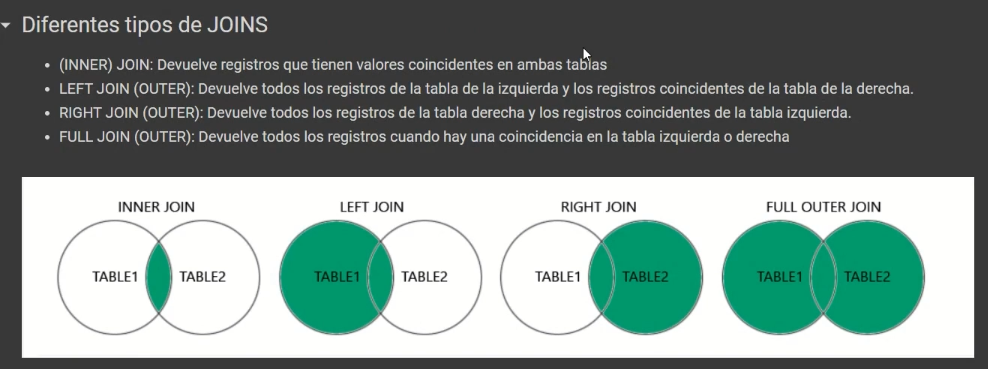

In [ ]:
#INNER JOIN
# Consulta SQL
query = '''
-- Selecciona todas las columnas de las tablas vendedores y ventas
SELECT
TV.*, TVE.*
FROM
vendedores TV -- Alias para la tabla vendedores
INNER JOIN VENTAS TVE -- Combina con la tabla ventas
ON TV.ID_VENDEDOR = TVE.ID_VENDEDOR; -- Condición de unión: ID_VENDEDOR debe coincidir
'''

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)

# Ejecutar y obtener los resultados (si no usas pandas)
cursor.execute(query)
print(cursor.fetchall())


    ID_VENDEDOR  NOMBRE APELLIDO  ID_SUCURSALES  ID_TRANSACCION  \
0             2    JUAN   CASTRO              2               1   
1             2    JUAN   CASTRO              2               2   
2             2    JUAN   CASTRO              2               3   
3             2    JUAN   CASTRO              2               4   
4             2    JUAN   CASTRO              2               5   
5             2    JUAN   CASTRO              2               6   
6             2    JUAN   CASTRO              2              12   
7             2    JUAN   CASTRO              2              13   
8             2    JUAN   CASTRO              2              14   
9             2    JUAN   CASTRO              2              15   
10            2    JUAN   CASTRO              2              19   
11            2    JUAN   CASTRO              2              20   
12            2    JUAN   CASTRO              2              21   
13            2    JUAN   CASTRO              2              2

In [ ]:
#LEFT JOIN
# Consulta SQL
query = '''
-- Selecciona todas las columnas de las tablas vendedores y ventas
SELECT
TV.*, TVE.*
FROM
vendedores TV -- Alias para la tabla vendedores
LEFT JOIN VENTAS TVE -- Combina con la tabla ventas
ON TV.ID_VENDEDOR = TVE.ID_VENDEDOR; -- Condición de unión: ID_VENDEDOR debe coincidir
'''

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)

# Ejecutar y obtener los resultados (si no usas pandas)
cursor.execute(query)
print(cursor.fetchall())


    ID_VENDEDOR  NOMBRE APELLIDO  ID_SUCURSALES  ID_TRANSACCION  \
0             1   MARTA     DIAZ              1             NaN   
1             2    JUAN   CASTRO              2             1.0   
2             2    JUAN   CASTRO              2             2.0   
3             2    JUAN   CASTRO              2             3.0   
4             2    JUAN   CASTRO              2             4.0   
5             2    JUAN   CASTRO              2             5.0   
6             2    JUAN   CASTRO              2             6.0   
7             2    JUAN   CASTRO              2            12.0   
8             2    JUAN   CASTRO              2            13.0   
9             2    JUAN   CASTRO              2            14.0   
10            2    JUAN   CASTRO              2            15.0   
11            2    JUAN   CASTRO              2            19.0   
12            2    JUAN   CASTRO              2            20.0   
13            2    JUAN   CASTRO              2            21.

In [ ]:
#RIGHT JOIN
# Consulta SQL
query = '''
-- Selecciona todas las columnas de las tablas vendedores y ventas
SELECT
TV.*, TVE.*
FROM
vendedores TV -- Alias para la tabla vendedores
RIGHT JOIN VENTAS TVE -- Combina con la tabla ventas
ON TV.ID_VENDEDOR = TVE.ID_VENDEDOR; -- Condición de unión: ID_VENDEDOR debe coincidir
'''

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)

# Ejecutar y obtener los resultados (si no usas pandas)
cursor.execute(query)
print(cursor.fetchall())

#NO ESTA SOPORTADO POR ESTA LIBRERIA, PERO COMO LA ANTERIOR PERO LOS DATOS LOS PONER A LA OTRA LADO DERECHA

DatabaseError: Execution failed on sql '
-- Selecciona todas las columnas de las tablas vendedores y ventas
SELECT 
TV.*, TVE.* 
FROM 
vendedores TV -- Alias para la tabla vendedores
RIGHT JOIN VENTAS TVE -- Combina con la tabla ventas
ON TV.ID_VENDEDOR = TVE.ID_VENDEDOR; -- Condición de unión: ID_VENDEDOR debe coincidir
': RIGHT and FULL OUTER JOINs are not currently supported

In [ ]:
#UNION
# Consulta SQL
query = '''
-- Selecciona todas las columnas de las tablas vendedores y ventas
SELECT
 TVE1.*
FROM
(SELECT * FROM ventas WHERE SUBSTR(fecha_transaccion,6,2)='08') TVE1
UNION
SELECT
TVE2.*
FROM
(SELECT * FROM ventas WHERE SUBSTR(fecha_transaccion,6,2)='09') TVE2

'''

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)

# Ejecutar y obtener los resultados (si no usas pandas)
cursor.execute(query)
print(cursor.fetchall())

    ID_TRANSACCION FECHA_TRANSACCION  ID_CANAL  ID_PRODUCTO  ID_VENDEDOR  \
0                1        2021-08-15         1        20005            2   
1                2        2021-08-15         1        20005            2   
2                3        2021-08-15         1        20007            2   
3                4        2021-08-16         1        20007            2   
4                5        2021-08-17         1        20005            2   
5                6        2021-08-18         1        20002            2   
6                7        2021-08-19         1        20004            3   
7                8        2021-08-20         1        20003            3   
8                9        2021-08-21         1        20007            3   
9               10        2021-08-22         2        20001            3   
10              11        2021-08-23         2        20005            3   
11              12        2021-08-24         2        20005            2   
12          

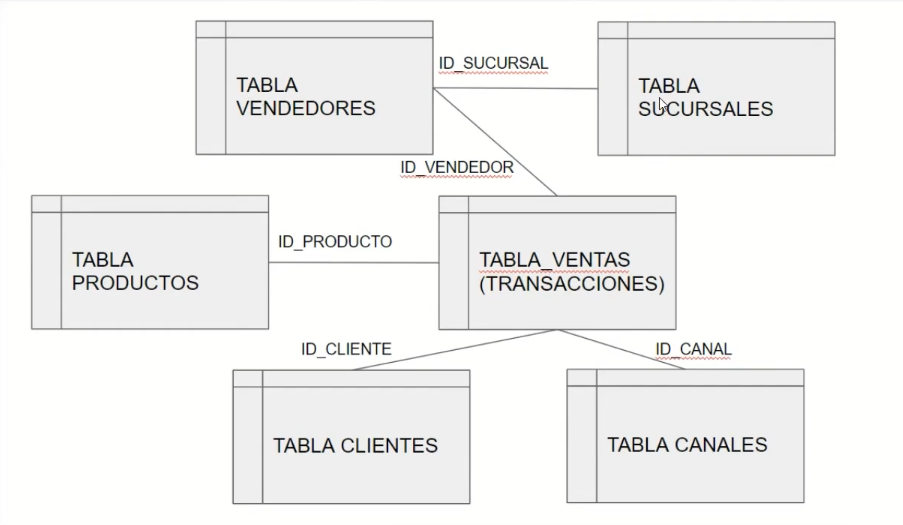

In [ ]:
#UNION
# Consulta SQL
query = '''
SELECT
    tv.*,
    tp.*,
    tca.*,
    tve.*,
    ts.*,
    tc.*
FROM
    ventas tv
LEFT JOIN
    productos tp ON tv.id_producto = tp.id_producto
LEFT JOIN
    canales tca ON tv.id_canal = tca.id_canal
LEFT JOIN
    vendedores tve ON tv.id_vendedor = tve.id_vendedor
LEFT JOIN
    sucursales ts ON tve.ID_SUCURSALES = ts.id_sucursal  -- Changed join condition to use tve.ID_SUCURSALES
LEFT JOIN
    clientes tc ON tv.id_cliente = tc.id_cliente;
'''

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)

# Ejecutar y obtener los resultados (si no usas pandas)
cursor.execute(query)
print(cursor.fetchall())


    ID_TRANSACCION FECHA_TRANSACCION  ID_CANAL  ID_PRODUCTO  ID_VENDEDOR  \
0                1        2021-08-15         1        20005            2   
1                2        2021-08-15         1        20005            2   
2                3        2021-08-15         1        20007            2   
3                4        2021-08-16         1        20007            2   
4                5        2021-08-17         1        20005            2   
5                6        2021-08-18         1        20002            2   
6                7        2021-08-19         1        20004            3   
7                8        2021-08-20         1        20003            3   
8                9        2021-08-21         1        20007            3   
9               10        2021-08-22         2        20001            3   
10              11        2021-08-23         2        20005            3   
11              12        2021-08-24         2        20005            2   
12          

Realizamos una consulta con todos los datos de la tabla ventas, algunas columnas de la tabla de vendedores pero únicamente en los casos donde el vendedor se llame PEDRO y con los datos de nombre, direccion y centro de costo de las sucursales involucradas en esas ventas (las de PEDRO).

In [ ]:
query = '''

SELECT
  tv.*,
  tve.nombre AS nombre_vendedor,
  tve.apellido AS apellido_vendedor,
  tve.id_sucursales,
  ts.nombre AS nombre_sucursal,
  ts.direccion AS direccion_sucursal,
  ts.centro_de_costo


FROM
  ventas tv
LEFT JOIN
  vendedores tve ON tv.id_vendedor=tve.id_vendedor AND tve.nombre='PEDRO'
LEFT JOIN
  sucursales ts ON tve.id_sucursales=ts.id_sucursal
;

 '''
# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)
cursor.execute(query)
conexion.commit()

    ID_TRANSACCION FECHA_TRANSACCION  ID_CANAL  ID_PRODUCTO  ID_VENDEDOR  \
0                1        2021-08-15         1        20005            2   
1                2        2021-08-15         1        20005            2   
2                3        2021-08-15         1        20007            2   
3                4        2021-08-16         1        20007            2   
4                5        2021-08-17         1        20005            2   
5                6        2021-08-18         1        20002            2   
6                7        2021-08-19         1        20004            3   
7                8        2021-08-20         1        20003            3   
8                9        2021-08-21         1        20007            3   
9               10        2021-08-22         2        20001            3   
10              11        2021-08-23         2        20005            3   
11              12        2021-08-24         2        20005            2   
12          

Ahora sin crear la tabla, realizaremos una consulta tratando de obtener únicamente los casos donde los clientes tienen ventas. La consulta devolverá todas las columnas de la tabla de clientes y solamente id_transaccion y fecha_transaccion de la tabla de ventas.

In [ ]:
query = '''
SELECT
  tc.*,
  tv.id_transaccion,
  tv.fecha_transaccion

FROM
  clientes tc
INNER JOIN
  ventas tv ON tc.id_cliente=tv.id_cliente
;

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,ID_CLIENTE,NOMBRE,APELLIDO,EDAD,PROVINCIA,FECHA_ALTA,ID_TRANSACCION,FECHA_TRANSACCION
0,100001,ADRIAN,HERNÁNDEZ,35,La Rioja,17/03/2021,1,2021-08-15
1,100001,ADRIAN,HERNÁNDEZ,35,La Rioja,17/03/2021,2,2021-08-15
2,100001,ADRIAN,HERNÁNDEZ,35,La Rioja,17/03/2021,3,2021-08-15
3,100001,ADRIAN,HERNÁNDEZ,35,La Rioja,17/03/2021,16,2021-08-28
4,100003,ANA,GONZÁLEZ,40,Jujuy,11/02/2021,4,2021-08-16
5,100003,ANA,GONZÁLEZ,40,Jujuy,11/02/2021,10,2021-08-22
6,100003,ANA,GONZÁLEZ,40,Jujuy,11/02/2021,34,2021-09-04
7,100003,ANA,GONZÁLEZ,40,Jujuy,11/02/2021,35,2021-09-04
8,100005,CRISTINA,SALINAS,46,Córdoba,21/04/2021,8,2021-08-20
9,100005,CRISTINA,SALINAS,46,Córdoba,21/04/2021,15,2021-08-27


Ahora utilizaremos las funciones de agregación aprendidas previamente para realizar consultas que agrupen ventas en base a grupos producidos con columnas de diferentes tablas relacionadas:

In [ ]:
#  Buscamos cantidad de ventas por provincia de clientes mayores a 40 años
query = '''

SELECT
  tc.provincia,
  count(tv.id_transaccion) AS ventas_mayores_40

FROM
  clientes tc
LEFT JOIN
  ventas tv ON tv.id_cliente=tc.id_cliente
WHERE
 tc.edad > 40
GROUP BY
  tc.provincia


 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,PROVINCIA,ventas_mayores_40
0,Buenos Aires,0
1,Chubut,4
2,Córdoba,7
3,La Pampa,0
4,Misiones,0
5,Salta,0


In [ ]:
#  Buscamos el promedio de la edad de aquellos clientes con ventas, agrupados por provincia y por canal
query = '''

SELECT
  tc.provincia,
  tca.desc_canal,
  ROUND(AVG(tc.edad)) AS promedio_edad

FROM
   clientes tc
LEFT JOIN
  ventas tv ON tc.id_cliente=tv.id_cliente
LEFT JOIN
  canales tca ON tv.id_canal=tca.id_canal
WHERE
  tv.id_cliente IS NOT NULL

GROUP BY
  tc.provincia,
  tca.desc_canal

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,PROVINCIA,DESC_CANAL,promedio_edad
0,Chubut,OFFLINE,45.0
1,Chubut,ONLINE,40.0
2,Córdoba,OFFLINE,42.0
3,Córdoba,ONLINE,43.0
4,Jujuy,OFFLINE,40.0
5,Jujuy,ONLINE,40.0
6,La Rioja,OFFLINE,25.0
7,La Rioja,ONLINE,33.0
8,Misiones,ONLINE,37.0
9,Salta,ONLINE,32.0


In [ ]:
#  Queremos que la consulta devuelva la cantidad de ventas por cliente siempre y cuando los clientes tengan mas de dos ventas
query = '''

SELECT
 tc.nombre||' '||tc.apellido AS cliente,
 count(tv.id_transaccion) AS cantidad_ventas


FROM
   clientes tc
INNER JOIN
  ventas tv ON tc.id_cliente=tv.id_cliente

GROUP BY
  tc.nombre||' '||tc.apellido
  having
    count(tv.id_transaccion)>2

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,cliente,cantidad_ventas
0,ADRIAN HERNÁNDEZ,4
1,ANA GONZÁLEZ,4
2,JAVIER GÓMEZ,6
3,MARTA ROSAS,5
4,MIGUEL VALDÉS,7
5,SERGIO CABRERO,4


In [ ]:
# Ejecutar una consulta que devuelva para cada cliente el importe y margen total de sus compras (tabla ventas) agrupado por id de comanda (ticket total).
query = '''

SELECT
  tc.nombre||' '||apellido AS cliente,
  tv.comanda AS ticket,
  SUM(tp.importe) AS importe_total,
  SUM(tp.margen) AS margen_total

FROM
  clientes tc
LEFT JOIN
  ventas tv ON tc.id_cliente=tv.id_cliente
LEFT JOIN
  productos tp ON tv.id_producto=tp.id_producto

GROUP BY
  tc.nombre||' '||apellido,
  tv.comanda

LIMIT 10

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,cliente,ticket,importe_total,margen_total
0,ADRIAN HERNÁNDEZ,311.0,40.0,4.0
1,ADRIAN HERNÁNDEZ,324.0,90.0,9.0
2,ALVARO TORRES,NaN,NaN,NaN
3,ANA GONZÁLEZ,312.0,20.0,2.0
4,ANA GONZÁLEZ,318.0,100.0,10.0
5,ANA GONZÁLEZ,332.0,70.0,7.0
6,ANDREA NAVARRO,NaN,NaN,NaN
7,CRISTINA SALINAS,316.0,1000.0,100.0
8,CRISTINA SALINAS,323.0,20.0,2.0
9,DANIEL SETIÉN,NaN,NaN,NaN


In [ ]:
# Ejecutar una consulta que devuelva el importe y margen total generado por cada sucursal durante el mes de Septiembre
query = '''

SELECT
  ts.nombre AS nombre_sucursal,

  SUM(tp.importe) AS importe_total,
  SUM(tp.margen) AS margen_total

FROM
  sucursales ts
LEFT JOIN
  vendedores tve ON ts.id_sucursal=tve.id_sucursales
LEFT JOIN
  ventas tv ON tve.id_vendedor=tv.id_vendedor
LEFT JOIN
  productos tp ON tv.id_producto=tp.id_producto
WHERE
  STRFTIME('%m', tv.fecha_transaccion) = '09'

GROUP BY
  ts.nombre

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,nombre_sucursal,importe_total,margen_total
0,PLAZA TANGO,600,59.0
1,URUGUAY,1500,150.0


In [ ]:
# Ejecutar una consulta que devuelva el importe y margen total por vendedor pero solo de los vendedores que han tenido mas de una venta.
query = '''
SELECT
  tvv.nombre||' ' ||tvv.apellido AS nombre_vendedor,
  sum(tp.importe) AS importe_total,
  sum(tp.margen) AS margen_total
FROM
  vendedores tvv
LEFT JOIN
  ventas tv ON tvv.id_vendedor=tv.id_vendedor
LEFT JOIN
  productos tp ON  tp.id_producto=tv.id_producto
GROUP BY
  tvv.nombre||' ' ||tvv.apellido
  HAVING
    count(tv.id_transaccion)>1

;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,nombre_vendedor,importe_total,margen_total
0,JUAN CASTRO,895,88.0
1,PEDRO BONILLA,2735,273.0


# Subsconsultas y Vistas

Las subconsultas y vistas son una manera que tiene SQL de emular que se esta consultando una tabla cuando en realidad se esta ejecutando una consulta que devuelve una tabla.

**En los casos donde utilizamos vistas**, podríamos haber creado previamente una tabla. Pero con la finalidad de no escribir la tabla y ocupar espacio en nuestra base de datos lo que guardamos es una vista, una sentencia completa a ejecutarse cada vez que la llamamos.

Esto ahorra espacio en el disco y nos facilita la escritura de código evitando tener que escribir toda la sentencia cada vez que la necesitemos, pero por otra parte obliga al servidor a ejecutar toda la lógica guardada en la vista cada vez que se ejecuta. Es un tradeoff entre ahorro de espacio pero mayor uso computacional.

**En los casos donde utilizamos subconsultas**, lo hacemos para evitar que el servidor trabaje con la totalidad de la tabla que estamos consultando. Es decir que podemos trabajar únicamente con la porción de tabla que indicamos en la subconsulta y de esa forma cargar menos al servidor.

In [7]:
#  Subconsultas en el FROM
query = '''
SELECT
  COUNT(id_transaccion)
FROM
  (SELECT
    *
   FROM
    ventas
   WHERE
    id_vendedor=2)


 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,COUNT(id_transaccion)
0,24


In [9]:
#  Subconsultas en el JOIN
query = '''
SELECT
  tv.*,
  tc.edad
FROM
  ventas tv
INNER JOIN
  (SELECT
    *
  FROM
    clientes
  WHERE
    edad = 46) tc ON tv.id_cliente=tc.id_cliente


 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,ID_TRANSACCION,FECHA_TRANSACCION,ID_CANAL,ID_PRODUCTO,ID_VENDEDOR,COMANDA,ID_CLIENTE,EDAD
0,8,2021-08-20,1,20003,3,316,100005,46
1,15,2021-08-27,2,20007,2,323,100005,46


In [10]:
#  Subconsultas en el WHERE
query = '''
SELECT
  *
FROM
  ventas
WHERE
  id_cliente IN
                  (
                    SELECT DISTINCT
                      ID_CLIENTE
                    FROM
                      clientes
                    WHERE EDAD < 40
                  )

 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,ID_TRANSACCION,FECHA_TRANSACCION,ID_CANAL,ID_PRODUCTO,ID_VENDEDOR,COMANDA,ID_CLIENTE
0,1,2021-08-15,1,20005,2,311,100001
1,2,2021-08-15,1,20005,2,311,100001
2,3,2021-08-15,1,20007,2,311,100001
3,7,2021-08-19,1,20004,3,315,100018
4,9,2021-08-21,1,20007,3,317,100008
5,11,2021-08-23,2,20005,3,319,100008
6,16,2021-08-28,1,20002,3,324,100001
7,17,2021-08-29,1,20006,3,325,100009
8,18,2021-08-30,1,20008,3,326,100009
9,19,2021-08-31,1,20007,2,327,100016


In [11]:
# Ejecutar una consulta devuelva el total de importe, margen y cantidad de ventas por cliente (nombre y apellido) pero solo con ventas del vendedor 2. Para obtener los datos de las ventas realizar
#  una subconsulta que filtre las ventas por vendedor=2.
query = '''

    SELECT
      tc.id_cliente,
      tc.nombre||' '||tc.apellido AS nombre_cliente,
      count(tv.id_transaccion) AS cantidad_ventas,
      sum(tp.importe) AS importe,
      sum(tp.margen) AS margen
    FROM
      clientes tc
    LEFT JOIN
      (SELECT
        *
      FROM
        ventas
      WHERE
        id_vendedor=2) tv ON tc.id_cliente=tv.id_cliente
    LEFT JOIN
      productos tp ON tv.id_producto=tp.id_producto
    GROUP BY
      tc.nombre||' '||tc.apellido



;
 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,ID_CLIENTE,nombre_cliente,cantidad_ventas,importe,margen
0,100001,ADRIAN HERNÁNDEZ,3,40.0,4.0
1,100002,ALVARO TORRES,0,NaN,NaN
2,100003,ANA GONZÁLEZ,3,90.0,9.0
3,100004,ANDREA NAVARRO,0,NaN,NaN
4,100005,CRISTINA SALINAS,1,20.0,2.0
5,100006,DANIEL SETIÉN,0,NaN,NaN
6,100007,DAVID CRUZ,0,NaN,NaN
7,100008,DIEGO GARCÍA,0,NaN,NaN
8,100009,IRENE GAS,0,NaN,NaN
9,100010,JAVIER GÓMEZ,3,70.0,6.0


In [12]:
# Crear una vista llamada "clientes_menor40_view"
query = '''
CREATE VIEW clientes_menor40_view AS
   SELECT
    id_cliente -- Seleccionar únicamente la columna id_cliente
  FROM
    clientes -- De la tabla clientes
  WHERE
    edad < 40 -- Condición: Solo incluir clientes menores de 40 años
'''

# Ejecutar la consulta
cursor.execute(query)
conexion.commit() # Confirmar los cambios en la base de datos




Una vista en SQL es una consulta guardada como un objeto de base de datos. Actúa como una tabla virtual que muestra datos provenientes de una o varias tablas según una consulta definida. Sirve para simplificar consultas complejas, mejorar la seguridad (limitando acceso a ciertos datos) y organizar datos para reportes.

In [13]:
query = '''

SELECT *
  FROM
    clientes_menor40_view


 '''

cursor.execute(query)
conexion.commit()
cols = [description[0] for description in cursor.description]
pd.DataFrame(cursor.fetchall(), columns=cols)

,ID_CLIENTE
0,100001
1,100004
2,100008
3,100009
4,100011
5,100012
6,100013
7,100015
8,100016
9,100017


In [14]:
# Repetimos la consulta pero con un INNER JOIN utilizando la vista 'clientes_menor40_view'
query = '''

    SELECT
      tc.id_cliente, -- Selecciona el ID del cliente de la tabla 'clientes'
      tc.nombre||' '||tc.apellido AS nombre_cliente, -- Combina el nombre y apellido del cliente en un solo campo
      count(tv.id_transaccion) AS cantidad_ventas, -- Cuenta la cantidad de transacciones realizadas por el cliente
      sum(tp.importe) AS importe, -- Suma el importe total de los productos vendidos
      sum(tp.margen) AS margen -- Suma el margen total de los productos vendidos
    FROM
      clientes tc -- Tabla principal: clientes
    LEFT JOIN
      (SELECT
        * -- Subconsulta: selecciona todas las columnas de 'ventas'
      FROM
        ventas
      WHERE
        id_vendedor=2) tv ON tc.id_cliente=tv.id_cliente -- Asocia ventas realizadas por el vendedor 2 con clientes
    LEFT JOIN
      productos tp ON tv.id_producto=tp.id_producto -- Asocia productos vendidos en las transacciones
    INNER JOIN
       clientes_menor40_view vista ON tc.id_cliente=vista.id_cliente -- Filtra los clientes menores de 40 años usando la vista
    GROUP BY
      tc.nombre||' '||tc.apellido -- Agrupa los resultados por el nombre completo del cliente

;
 '''

# Ejecuta la consulta en la base de datos
cursor.execute(query)
conexion.commit()

# Obtiene los nombres de las columnas del resultado
cols = [description[0] for description in cursor.description]

# Crea un DataFrame con los resultados de la consulta
pd.DataFrame(cursor.fetchall(), columns=cols)


,ID_CLIENTE,nombre_cliente,cantidad_ventas,importe,margen
0,100001,ADRIAN HERNÁNDEZ,3,40.0,4.0
1,100004,ANDREA NAVARRO,0,NaN,NaN
2,100008,DIEGO GARCÍA,0,NaN,NaN
3,100009,IRENE GAS,0,NaN,NaN
4,100011,JORGE CURIEL,0,NaN,NaN
5,100012,LAURA VERDUZCO,0,NaN,NaN
6,100013,MARIA VARELA,0,NaN,NaN
7,100015,MIGUEL VALDÉS,6,380.0,38.0
8,100016,PABLO VANEGAS,1,20.0,2.0
9,100017,PAULA VIVEROS,1,25.0,2.0


# CONDICIONAL CASE

La expresión CASE es una expresión condicional que funciona de la misma manera que un IF en python.

Esta expresión va comprobando la veracidad la expresión desde la primera clausula WHEN, y se detiene siempre que la expresión sea verdadera sin continuar comprobando el resto de las cláusulas. En tal caso, devuelve lo que sea que le hayamos indicado en la cláusula THEN. Si ninguna de las cláusulas WHEN se comprueba verdadera puede devolver aquello que le hayamos indicado al final de la expresion con un ELSE (opcional, sin el ELSE devuelve nulos). Le expresión siempre debe finalizar con la cláusula END.

In [17]:
# Hacemos un CASE para clasificar la edad de los clientes en rangos
query = '''

    SELECT
      CASE
        WHEN tc.edad > 40 THEN 'MAYOR_40' -- Clasifica como 'MAYOR_40' si la edad es mayor a 40
        WHEN tc.edad = 40 THEN 'JUSTO_40' -- Clasifica como 'JUSTO_40' si la edad es exactamente 40
        ELSE 'MENOR_40' END AS rango_edad, -- Clasifica como 'MENOR_40' si la edad es menor a 40
      count(tv.id_transaccion) AS cantidad_ventas, -- Cuenta las transacciones realizadas por cada rango de edad
      sum(tp.importe) AS importe, -- Suma el importe total de los productos vendidos por rango de edad
      sum(tp.margen) AS margen -- Suma el margen total de los productos vendidos por rango de edad
    FROM
      clientes tc -- Tabla principal: clientes
    LEFT JOIN
      (SELECT
        * -- Subconsulta: selecciona todas las columnas de 'ventas'
      FROM
        ventas
      WHERE
        id_vendedor=2) tv ON tc.id_cliente=tv.id_cliente -- Asocia ventas realizadas por el vendedor 2 con clientes
    LEFT JOIN
      productos tp ON tv.id_producto=tp.id_producto -- Asocia productos vendidos en las transacciones

    GROUP BY
      CASE
        WHEN tc.edad > 40 THEN 'MAYOR_40' -- Agrupa los resultados por los rangos de edad definidos
        WHEN tc.edad = 40 THEN 'JUSTO_40'
        ELSE 'MENOR_40' END

;
 '''

# Ejecuta la consulta en la base de datos
cursor.execute(query)
conexion.commit()

# Obtiene los nombres de las columnas del resultado
cols = [description[0] for description in cursor.description]

# Crea un DataFrame con los resultados de la consulta
pd.DataFrame(cursor.fetchall(), columns=cols)




,rango_edad,cantidad_ventas,importe,margen
0,JUSTO_40,6,160,15.0
1,MAYOR_400,7,270,27.0
2,MENOR_40,11,465,46.0


In [16]:
# Clasificamos la edad de los clientes en rangos usando CASE
query = '''

    SELECT
      CASE
        WHEN tc.edad > 40 THEN 'MAYOR_40' -- Clasifica como 'MAYOR_40' si edad > 40
        WHEN tc.edad = 40 THEN 'JUSTO_40' -- Clasifica como 'JUSTO_40' si edad = 40
        ELSE 'MENOR_40' END AS rango_edad, -- Clasifica como 'MENOR_40' si edad < 40
      count(tv.id_transaccion) AS cantidad_ventas, -- Cuenta el total de transacciones por rango de edad
      sum(tp.importe) AS importe, -- Suma el importe total de ventas por rango de edad
      sum(tp.margen) AS margen -- Suma el margen total de ventas por rango de edad
    FROM
      clientes tc -- Tabla principal: clientes
    LEFT JOIN
      (SELECT
        * -- Selecciona todas las columnas de la tabla ventas
      FROM
        ventas
      WHERE
        id_vendedor=2) tv ON tc.id_cliente=tv.id_cliente -- Vincula las ventas del vendedor 2 con los clientes
    LEFT JOIN
      productos tp ON tv.id_producto=tp.id_producto -- Vincula las transacciones con los productos vendidos

    GROUP BY
      CASE
        WHEN tc.edad > 40 THEN 'MAYOR_40' -- Agrupa los resultados según el rango de edad definido
        WHEN tc.edad = 40 THEN 'JUSTO_40'
        ELSE 'MENOR_40' END

;
 '''

# Ejecuta la consulta SQL
cursor.execute(query)
conexion.commit()

# Obtiene los nombres de las columnas del resultado
cols = [description[0] for description in cursor.description]

# Crea un DataFrame con los datos obtenidos de la consulta
pd.DataFrame(cursor.fetchall(), columns=cols)


,rango_edad,cantidad_ventas,importe,margen
0,JUSTO_40,6,160,15.0
1,MAYOR_40,7,270,27.0
2,MENOR_40,11,465,46.0
